<a href="https://colab.research.google.com/github/sonudoo/DSA/blob/master/Machine%20Leaning/NeuralNetworkUsingTensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import math

In [0]:
def predict_using_nn(X_train, Y_train, hidden_units, activations, epochs, learning_rate):
    X = tf.placeholder(tf.float64, shape=X_train.shape)
    Y = tf.placeholder(tf.float64, shape=Y_train.shape)
    W = dict()
    b = dict()
    Z = dict()
    A = dict()
    for i in range(len(hidden_units) + 1):
        if i == 0:
            # Input layer
            W[str(i+1)] = tf.Variable(np.random.randn(hidden_units[i], X_train.shape[0]), name='W'+str(i+1))
            b[str(i+1)] = tf.Variable(np.random.randn(hidden_units[i], 1), name='b'+str(i+1))
            Z[str(i+1)] = tf.add(tf.matmul(W[str(i+1)], X), b[str(i+1)])
        elif i == len(hidden_units):
            # Output layer
            W[str(i+1)] = tf.Variable(np.random.randn(Y_train.shape[0], hidden_units[i-1]), name='W'+str(i+1))
            b[str(i+1)] = tf.Variable(np.random.randn(Y_train.shape[0], 1), name='b'+str(i+1))
            Z[str(i+1)] = tf.add(tf.matmul(W[str(i+1)], A[str(i)]), b[str(i+1)])
        else:
            W[str(i+1)] = tf.Variable(np.random.randn(hidden_units[i], hidden_units[i-1]), name='W'+str(i+1))
            b[str(i+1)] = tf.Variable(np.random.randn(hidden_units[i], 1), name='b'+str(i+1))
            Z[str(i+1)] = tf.add(tf.matmul(W[str(i+1)], A[str(i)]), b[str(i+1)])
            
            
        if activations[i] == 'tanh':
            A[str(i+1)] = tf.nn.tanh(Z[str(i+1)])
        elif activations[i] == 'relu':
            A[str(i+1)] = tf.nn.relu(Z[str(i+1)])
        elif activations[i] == 'sigmoid':
            A[str(i+1)] = tf.nn.sigmoid(Z[str(i+1)])
        else:
            A[str(i+1)] = Z[str(i+1)]
        
    Y_pred = A[str(len(hidden_units) + 1)]
    J = tf.reduce_mean(tf.abs(tf.subtract(Y_pred, Y)))
    
    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(J)
    
    for i in range(epochs):
        if (i + 1) % 100 == 0:
            print(i, sess.run([optimizer, J], feed_dict={X: X_train, Y: Y_train})[1])
        else:
            sess.run([optimizer, J], feed_dict={X: X_train, Y: Y_train})
    
    Y_pred_val = sess.run(Y_pred, feed_dict={X: X_train, Y: Y_train})
    return Y_pred_val

99 0.6601068067170694
199 0.6561442789203471
299 0.6546629780942418
399 0.6532343322425394
499 0.6517892096249946
599 0.6503009328847053
699 0.6487359520531905
799 0.647075071675775
899 0.6452825470649717
999 0.6433125877219722
1099 0.6411361937166805
1199 0.6387024761857828
1299 0.6359718281986312
1399 0.6328768391436397
1499 0.6293222075683779
1599 0.6251843197970218
1699 0.6202668140972941
1799 0.6143009092704333
1899 0.6068904327133129
1999 0.5974196239426672
2099 0.5849323127152553
2199 0.567811842592065
2299 0.543137260329615
2399 0.5046640579746907
2499 0.43736832713928353
2599 0.32003877477994436
2699 0.1714934180558635
2799 0.21136160848432436
2899 0.19008278493722738
2999 0.15398923170478387
3099 0.21085128261552308
3199 0.09714552943759033
3299 0.1553948173072656
3399 0.16970945213201438
3499 0.08456463160317433
3599 0.14048921193776
3699 0.08036527371203306
3799 0.13489211086695851
3899 0.2165985412940002
3999 0.17720157047000226
4099 0.0737709974257652
4199 0.1322642230018

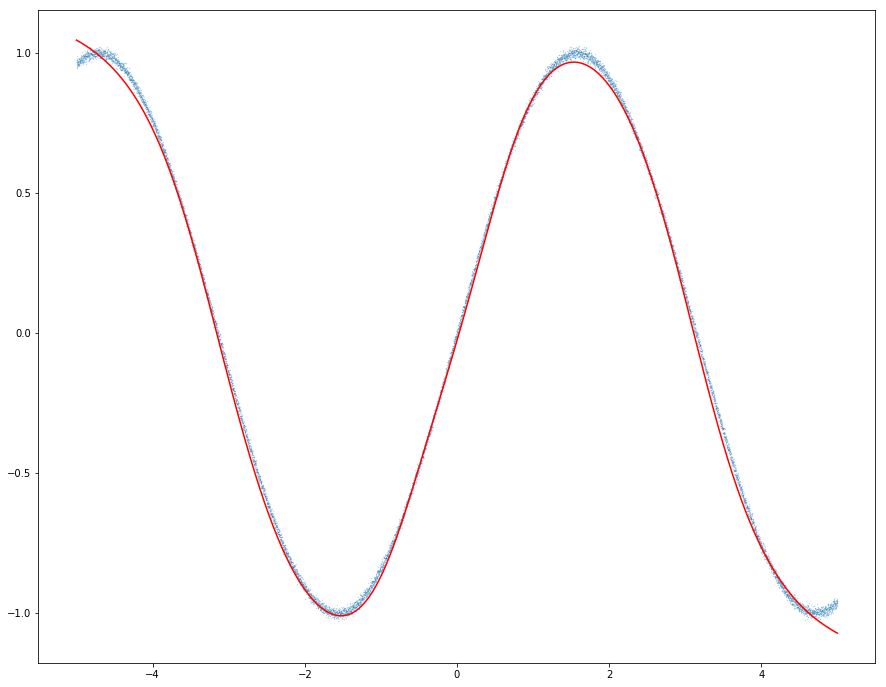

In [0]:
X_train = np.linspace(-5, 5, 10000).reshape(1, 10000)
Y_train = (np.sin(X_train) + np.random.randn(10000) / 100).reshape(1, 10000)
Y_pred = predict_using_nn(X_train, Y_train, [10, 5, 3], ['sigmoid', 'sigmoid', 'tanh', 'none'], 100000, 0.01)
plt.figure(figsize=(15, 12))
plt.scatter(X_train, Y_train, s=0.05, alpha=0.5)
plt.plot(X_train[0], Y_pred[0], c='r')